<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- 

https://medium.com/@ml.at.berkeley/tricking-neural-networks-create-your-own-adversarial-examples-a61eb7620fd8

https://adversarial-ml-tutorial.org/adversarial_examples/

https://harvard-iacs.github.io/2019-CS109B/lecture/lab21/AdversarialNN/

https://adversarial-ml-tutorial.org/adversarial_examples/

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

Targeted - adding carefully nosie despite looking same to human
non-targated- find any input which tricks model

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

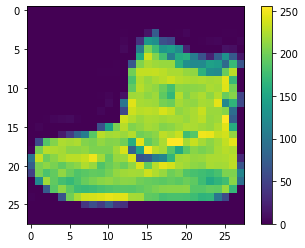

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

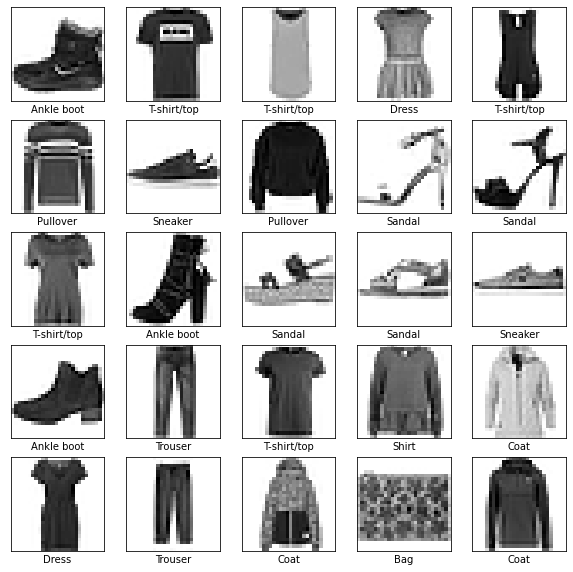

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6155 - accuracy: 0.7866
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3799 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.229

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3367 - accuracy: 0.8834

Test accuracy: 0.883400022983551


Ref - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [17]:
first_image = test_images[0]
label=class_names[test_labels[0]]
predictions= model.predict(test_images)
image_probs = np.argmax(predictions[0])

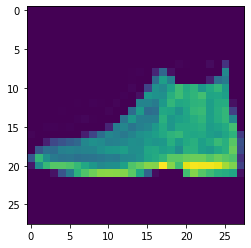

In [18]:
plt.figure()
plt.imshow(first_image) # To change [-1, 1] to [0,1]
plt.show()

In [19]:
label

'Ankle boot'

In [20]:
image_probs

9

In [40]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    print("prediction is", prediction)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [41]:
in_image = tf.Variable(first_image.reshape((1, 28, 28)).astype(np.float32) /255.0)

In [44]:
print(test_labels[0])

9


prediction is tf.Tensor(
[[-2.670969  -7.5988626 -4.4640903 -4.240512  -5.338334   0.7549819
  -2.6330693 -5.0902476 -4.852653  -8.209261 ]], shape=(1, 10), dtype=float32)
perturbations is tf.Tensor(
[[[ 1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
  [-1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
   -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
  [-1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.
   -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.]
  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.]
  [ 1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
   -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.]
  [ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   -1. -1. -1. 

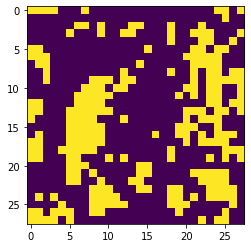

In [43]:
perturbations = create_adversarial_pattern(in_image, test_labels[0])
print("perturbations is",perturbations)
plt.imshow(perturbations[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [24]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(label))
  plt.show()

In [25]:
adv_x = first_image + 0.1*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)

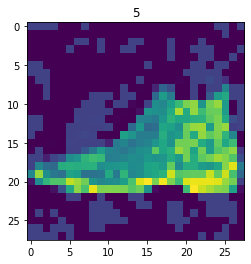

In [26]:
display_images(adv_x)

Its difficult to tell if its show or a sandle

ToDO-- Do it for the entire batch

Targetted Atatck

In [27]:
#every image prediction is same

In [29]:
p = model(adv_x, training=False)

In [30]:
originalLoss = -loss_object(tf.convert_to_tensor([9]),p)

In [31]:
targetLoss = loss_object(tf.convert_to_tensor([2]),p)

In [32]:
totalLoss = originalLoss + targetLoss

In [ ]:
instead of maximizing the loss of the true label, we maximize the loss of the loss of the true label and also minimize the loss for the alternative label.

In [76]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern_targated(input_image, input_label,my_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
    alt_loss = -loss_object(my_label,prediction)
    total_los = loss+alt_loss

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(total_los, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [77]:
test_labels[1]

2

In [78]:
perturbations_targated = create_adversarial_pattern_targated(in_image, test_labels[0],test_labels[1])


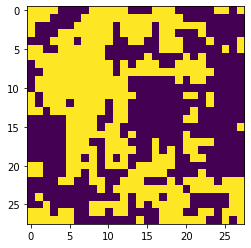

In [79]:
plt.imshow(perturbations_targated[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [105]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(class_names[label]))
  plt.show()

In [106]:
adv_x_targated = first_image + 0.15*perturbations_targated
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

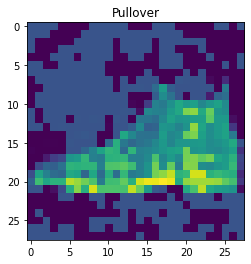

In [107]:
display_images(adv_x_targated)

It is predicting 2. But will it predict anoter image also 2?

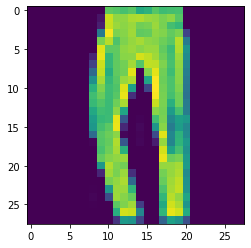

In [108]:
plt.imshow(test_images[5])

In [109]:
adv_x_targated = test_images[5] + 0.12*perturbations_targated #but it wroked for .12 and above value
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

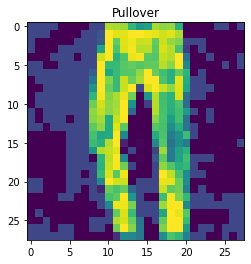

In [110]:
display_images(adv_x_targated)